In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/players-stats/england-premier-league-players-2018-to-2019-stats.csv


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('../input/players-stats/england-premier-league-players-2018-to-2019-stats.csv')
pd.options.display.max_columns = None
df.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,20,11,9,0,0,0,1,1,0,0,0,3,2,1,22,12,10,1,0,0.06,0.06,0.00,0.00,0.00,0,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,England,16,7,9,1,1,0,1,1,0,0,0,4,2,2,20,8,12,1,0,0.15,0.07,0.07,0.18,0.00,1217,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,15,14,3,1,2,1,0,1,1,0,4,3,1,46,20,26,4,0,0.15,0.04,0.12,0.08,0.16,776,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,Wales,28,14,14,4,2,2,6,5,1,0,0,7,6,1,12,2,10,0,0,0.68,0.41,0.27,0.26,0.28,332,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,21,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,England,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [27]:
pl=df[['full_name','age','birthday_GMT','position','Current Club','minutes_played_overall','nationality','appearances_overall','goals_overall','assists_overall','penalty_goals','penalty_misses','clean_sheets_overall','yellow_cards_overall','red_cards_overall']]
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   full_name               570 non-null    object
 1   age                     570 non-null    int64 
 2   birthday_GMT            570 non-null    object
 3   position                570 non-null    object
 4   Current Club            570 non-null    object
 5   minutes_played_overall  570 non-null    int64 
 6   nationality             570 non-null    object
 7   appearances_overall     570 non-null    int64 
 8   goals_overall           570 non-null    int64 
 9   assists_overall         570 non-null    int64 
 10  penalty_goals           570 non-null    int64 
 11  penalty_misses          570 non-null    int64 
 12  clean_sheets_overall    570 non-null    int64 
 13  yellow_cards_overall    570 non-null    int64 
 14  red_cards_overall       570 non-null    int64 
dtypes: int

In [28]:
pl=pl.rename(columns={'birthday_GMT':'birthday','Current Club':'club','goals_overall':'goals','assists_overall':'assists'})

In [29]:
pl.duplicated().sum()

0

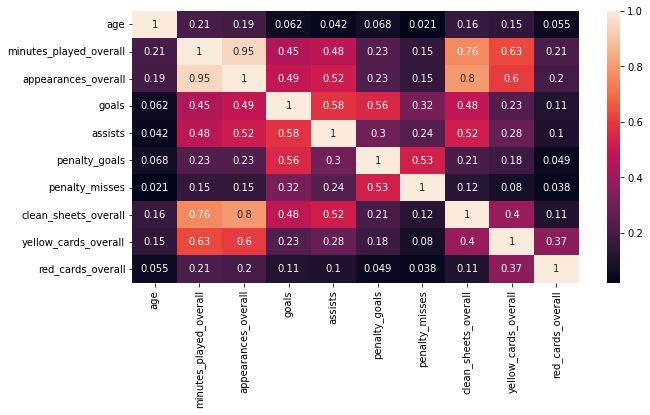

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(pl.corr(),annot=True);

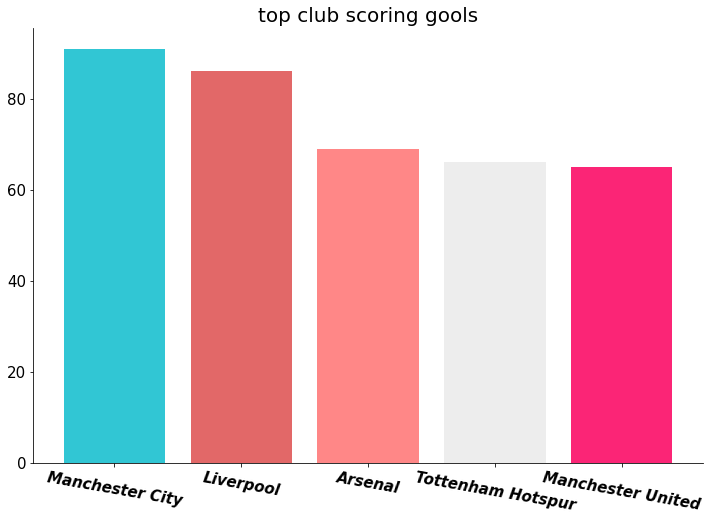

In [136]:
#top clubs socre in premier league
goals_per_club=pl.groupby('club')['goals'].sum().sort_values(ascending=False)
goals_per_club=goals_per_club.reset_index().head()
colors=['#31C6D4','#E26868','#FF8787','#EDEDED','#FB2576']
plt.figure(figsize=(12,8))
plt.bar(goals_per_club['club'],goals_per_club['goals'],color=colors)
plt.xticks(fontsize=15,rotation=350,fontweight='bold',fontstyle='italic')
plt.yticks(fontsize=15)
plt.title('top club scoring gools',fontsize=20)
sns.despine()
plt.show()

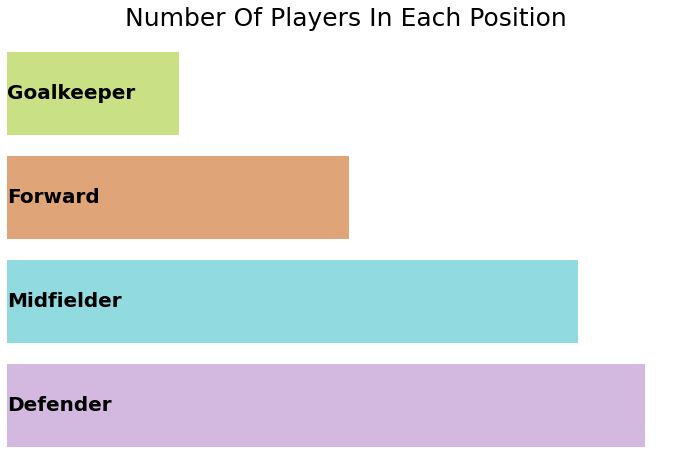

In [137]:
position=df['position'].unique()
plt.figure(figsize=(12,8))
plt.barh(df['position'].unique(),df['position'].value_counts(),
         color = ['#D3B9DF','#90DAE0','#E0A479','#CAE084'])
for i ,p in enumerate(position):
    plt.text(0,p,f"{p}",fontsize=20,va='center',ha='left',fontweight='bold')
plt.title(' Number Of Players In Each Position',fontsize=25,)    
plt.axis('off')
plt.show()

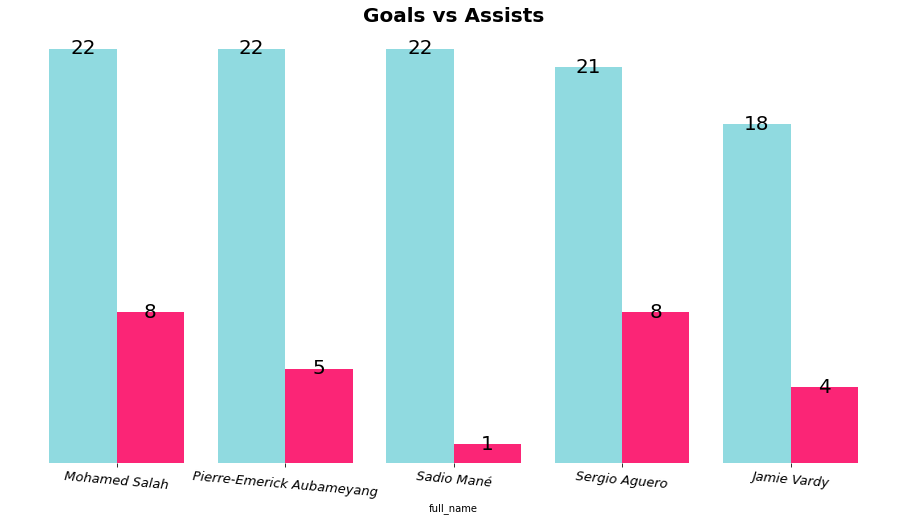

In [134]:
#top 5 scorrers
color=['#90DAE0','#FB2576']
scorrers= pl[['full_name','goals','assists','penalty_goals','position']].sort_values(by=['goals','assists'],ascending=False)
scorrers=scorrers.head()
pd.DataFrame(scorrers[['full_name','goals','assists']]).set_index('full_name').plot(kind='bar',figsize=(16,8),legend=False,color=color,width=0.8)
goals=pl.goals.sort_values(ascending=False).head()
assists=scorrers.assists.head()
for i ,p in enumerate(goals):
    plt.text(i-0.2,p,f"{p}",fontsize=20,va='center',ha='center')
for i ,p in enumerate(assists):
    plt.text(i+0.2,p,f"{p}",fontsize=20,va='center',ha='center')    
plt.xticks(fontsize=13,rotation=355,fontstyle='italic')
plt.title('Goals vs Assists',fontsize=20,fontweight='bold')
plt.yticks([])
sns.despine(bottom=True,left=True)
plt.show()

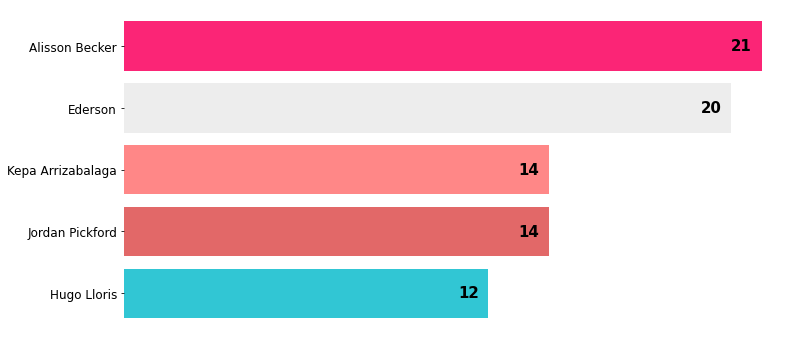

In [197]:
Goalkeeper=pl[pl['position']=='Goalkeeper']
Goalkeeper=Goalkeeper[['full_name','clean_sheets_overall','club']].sort_values('clean_sheets_overall',ascending=False).head()
Goalkeeper=Goalkeeper.sort_values('clean_sheets_overall',ascending=True)
plt.figure(figsize=(12,6))
plt.barh(Goalkeeper['full_name'],Goalkeeper['clean_sheets_overall'].sort_values(ascending=True),color=['#31C6D4','#E26868','#FF8787','#EDEDED','#FB2576'])
Goalkeeper=Goalkeeper['clean_sheets_overall']
for i ,p in enumerate(Goalkeeper):
    plt.text(p-1,i,f"{p}",fontsize=15,va='center',ha='left',fontweight='bold')
plt.xticks([])
plt.yticks(fontsize=12)
sns.despine(left=True,right=True,bottom=True)
plt.show()


In [36]:
#youngest players
young= pl[['full_name','age']].sort_values('age',ascending=True)
young.head(3) 

,full_name,age
125,Curtis Jones,20
392,Matty Daly,20
241,James Garner,20


In [37]:
#top defenders scoring goals and there clubs
defe= pl[pl['position']=='Defender']
defe[['full_name','goals','club']].sort_values('goals',ascending=False).head(7)


,full_name,goals,club
505,Shane Duffy,5,Brighton & Hove Albion
418,Nathan Aké,4,AFC Bournemouth
92,Callum Paterson,4,Cardiff City
348,Lucas Digne,4,Everton
385,Matt Doherty,4,Wolverhampton Wanderers
560,Willy Boly,4,Wolverhampton Wanderers
513,Souleymane Bamba,4,Cardiff City


In [38]:
#clean cheats and defenders
defe[['full_name','clean_sheets_overall','goals','assists','club']].sort_values('clean_sheets_overall',ascending=False).head(7)


,full_name,clean_sheets_overall,goals,assists,club
45,Andrew Robertson,21,0,11,Liverpool
551,Virgil van Dijk,21,4,2,Liverpool
67,Aymeric Laporte,18,3,3,Manchester City
329,Kyle Walker,18,1,1,Manchester City
537,Trent Alexander-Arnold,16,1,12,Liverpool
147,David Luiz,16,3,2,Chelsea
102,Cesar Azpilicueta,16,1,5,Chelsea


<Figure size 720x360 with 0 Axes>

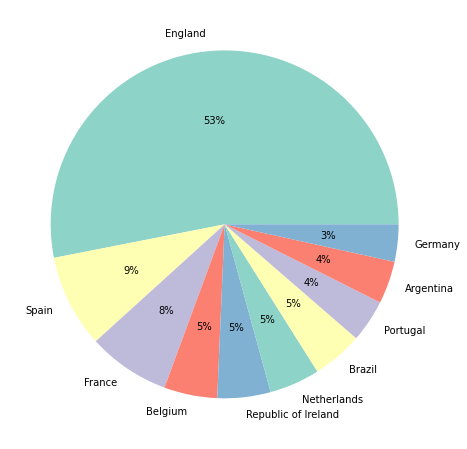

In [184]:
#nationalties in pl
nation=pl['nationality'].value_counts()
plt.figure(figsize=(10,5))
colors = sns.color_palette('Set3')[0:5]
nation=nation.nlargest(n=10)
plt.figure(figsize=(16,8))
plt.pie(nation,labels=nation.index, colors = colors, autopct='%.0f%%')
#for i,p in enumerate(nation):
 #   plt.text(i,p,f"{p}",fontsize=10,va='center',ha='center',fontweight='bold')
#sns.despine()
plt.show()

In [40]:
# top players getting cards
card=pl[['full_name','yellow_cards_overall','red_cards_overall','club','position']].sort_values(by=['yellow_cards_overall','red_cards_overall'],ascending=False)
card.head(7)


,full_name,yellow_cards_overall,red_cards_overall,club,position
179,Etienne Capoue,15,1,Watford,Midfielder
294,José Holebas,13,1,Watford,Defender
182,Fabian Schär,12,0,Newcastle United,Defender
262,Jefferson Lerma,12,0,AFC Bournemouth,Midfielder
479,Ryan Bennett,12,0,Wolverhampton Wanderers,Defender
511,Sokratis Papastathopoulos,12,0,Arsenal,Defender
161,Diogo José Teixeira da Silva,11,0,Wolverhampton Wanderers,Midfielder


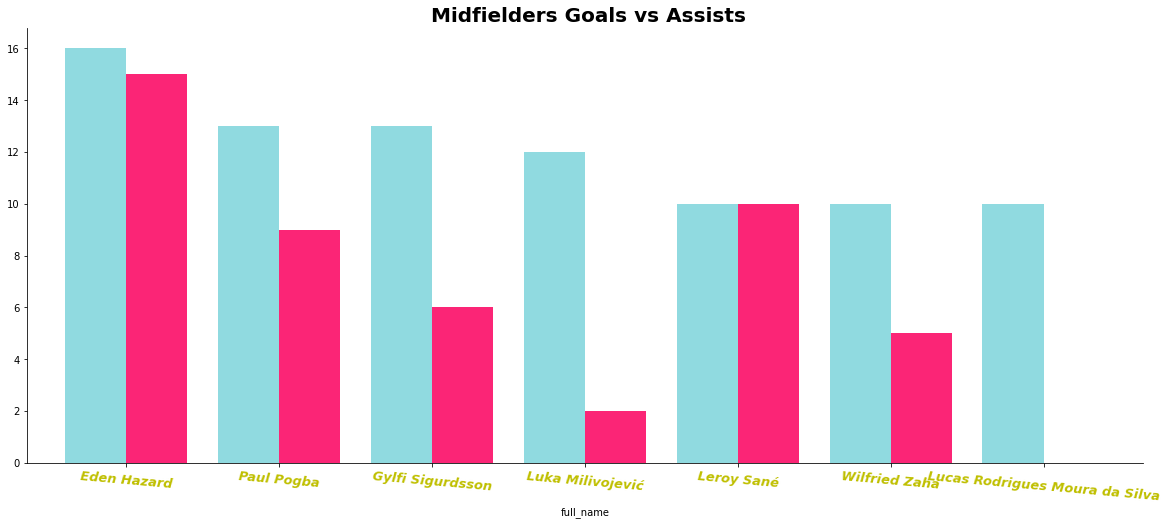

In [144]:
#midfielders
mid= pl[pl['position']=='Midfielder']
mid=mid[['full_name','goals','assists','club']].sort_values(by=['goals','assists'],ascending=False).head(7)
pd.DataFrame(mid[['full_name','goals','assists']]).set_index('full_name').plot(kind='bar',figsize=(20,8),legend=False,color=color,width=0.8)
plt.xticks(fontsize=13,rotation=355,fontweight='bold',fontstyle='italic',color='y')
plt.title(' Midfielders Goals vs Assists',fontsize=20,fontweight='bold')
sns.despine()
plt.show()
